In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython .display import display
import os

In [2]:
#csv読み込み
df = pd.read_csv('./train.csv')
df2 = pd.read_csv('./test.csv')

In [3]:
#中身見る用
#AgeがNaN多すぎで他の列をもとに適当な値を入れたい
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print(df[df.isnull().any(axis=1)].shape)
df[df.isnull().any(axis=1)].head()

(708, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#NameのMrとかMissで何かわかりそうだから名前を見てみる
df['honorific'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['honorific'].value_counts() #敬称別のレコード数

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Mme               1
the Countess      1
Capt              1
Sir               1
Don               1
Lady              1
Jonkheer          1
Name: honorific, dtype: int64

In [7]:
#一応テストデータも観てみる
df2['honorific'] = df2['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df2['honorific'].value_counts() #敬称別のレコード数

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: honorific, dtype: int64

In [8]:
df.shape

(891, 13)

In [9]:
#dfにしかないミドルネームがある列を削除したい。ただしMlleとLadyとMsはMissとして扱いたい
#テストデータのMsとDonaもMissにする?したらだめかも
#削除で失敗したら面倒なため別の変数df_!を用意する
honorific_only = ['Major','Capt','Don','Mme','Jonkheer','the Countess','Sir']
df_1 = df[~df['honorific'].isin(honorific_only) ].reset_index(drop=True)

In [10]:
df_1.shape

(883, 13)

In [11]:
df_1['honorific'].replace('Col','Other',inplace=True)

In [12]:
#上記で削除しなかった訓練にもテストデータにもある項目をotherに変更する
df_1['honorific'].replace(['Col','Rev','Dr'], 'Other',inplace=True)
df_1['honorific'].replace(['Mlle','Ms','Lady'],'Miss',inplace=True)

In [13]:
#確認
#df_1['honorific'] = df_1['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df_1['honorific'].value_counts() #敬称別のレコード数

Mr        517
Miss      186
Mrs       125
Master     40
Other      15
Name: honorific, dtype: int64

In [14]:
#Cabin列を削除
#df_1 = df.drop(['Cabin'], axis=1)
#df_1[df_1.isnull().any(axis=1)].head()

In [15]:
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
honorific        0
dtype: int64

<AxesSubplot:>

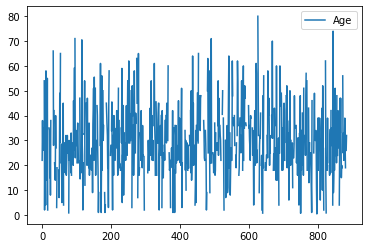

In [16]:
#練習
df_1.plot(y='Age')

<AxesSubplot:>

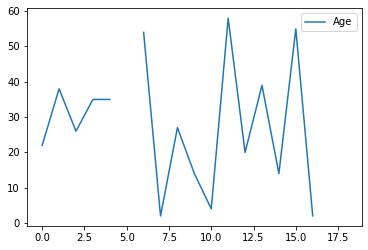

In [17]:
#df[:5].plot.bar('Age')
df_1[:20].plot(y='Age')

<AxesSubplot:ylabel='Frequency'>

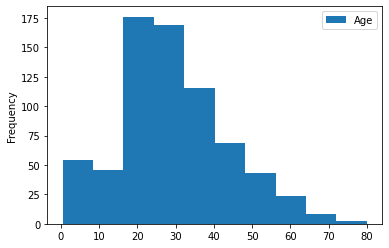

In [18]:
df_1.plot.hist(y='Age')

<AxesSubplot:ylabel='Frequency'>

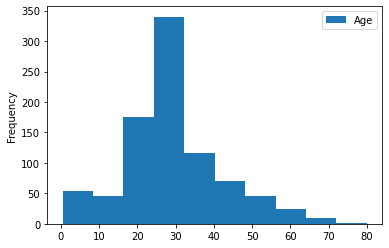

In [45]:
df_2 = df_1
#Sexをもとに年齢を入力
for grp, data in df.groupby('Sex'):
    val2 = data['Age'].mean()
    df_2.loc[df['Sex']==grp,'Age'] = data['Age'].fillna(value=val2)

df_2.plot.hist(y='Age')

In [29]:
df_3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
honorific        0
dtype: int64

In [41]:
df_3 = df_1
#df_3['Age'].fillna(value=df_3['Age'].mean())
df_3["Age"] = df_3["Age"].fillna(df_3["Age"].median())

In [42]:
print(df_3['Age'].median())

28.0


<AxesSubplot:ylabel='Frequency'>

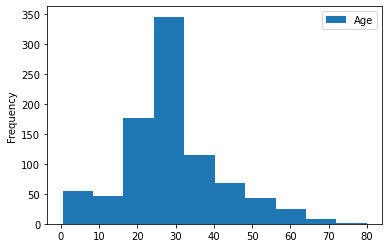

In [43]:
df_3.plot.hist(y='Age')

In [32]:
print(df_3['Age'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
878    False
879    False
880     True
881    False
882    False
Name: Age, Length: 883, dtype: bool


In [34]:
df_4.isnull().sum()

0

In [7]:
df.groupby(['Sex','Pclass'])['Fare'].median()

Sex     Pclass
female  1         82.66455
        2         22.00000
        3         12.47500
male    1         41.26250
        2         13.00000
        3          7.92500
Name: Fare, dtype: float64

In [8]:
#EmbarkedのnanにはSを入れる
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())
df.fillna(value={'Embarked': 'S'}, inplace=True)

In [10]:
#EmbarkedのnanにはSを入れる
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
#中身見る用
#AgeがNaN多すぎで他の列をもとに適当な値を入れたい
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
#Sex,Embarkedは文字から数字に変える
df["Sex"][df["Sex"] == "male"] = 0
df["Sex"][df["Sex"] == "female"] = 1
df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2

<ipython-input-12-b7bd64179115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"][df["Sex"] == "male"] = 0
<ipython-input-12-b7bd64179115>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"][df["Sex"] == "female"] = 1
<ipython-input-12-b7bd64179115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"][df["Embarked"] == "S"] = 0
<ipython-input-12-b7bd64179115>:5: SettingWithCopyWarning: 
A value is trying to b

In [13]:
#warning出たため一応中身を確認
df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [14]:
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [15]:
#加工
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#train_x = df.drop(['Name','PassengerId','Ticket','Cabin','Survived','Embarked','Age','Sex'], axis=1)
#train_x = df.drop(['Name','PassengerId','Ticket','Cabin','Survived'], axis=1)
train_x = df.drop(['Name','PassengerId','Ticket','Cabin','Survived'], axis=1)
train_y = df['Survived']

In [16]:
#学習
forest = RandomForestClassifier(n_estimators=100, random_state= 41)
forest = forest.fit(train_x, train_y)
print("training set{:.3f}".format(forest.score(train_x, train_y)))

training set0.982


In [17]:
#Sex,Embarkedは文字から数字に変える
df2["Sex"][df2["Sex"] == "male"] = 0
df2["Sex"][df2["Sex"] == "female"] = 1
df2["Embarked"][df2["Embarked"] == "S"] = 0
df2["Embarked"][df2["Embarked"] == "C"] = 1
df2["Embarked"][df2["Embarked"] == "Q"] = 2

<ipython-input-17-6203b72587d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sex"][df2["Sex"] == "male"] = 0
<ipython-input-17-6203b72587d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sex"][df2["Sex"] == "female"] = 1
<ipython-input-17-6203b72587d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Embarked"][df2["Embarked"] == "S"] = 0
<ipython-input-17-6203b72587d6>:5: SettingWithCopyWarning: 
A value is tryin

In [18]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
for grp, data in df2.groupby('Sex'):
    val2 = data['Age'].mean()
    df2.loc[df2['Sex']==grp,'Age'] = data['Age'].fillna(value=val2)

In [20]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#testにNaNがあったためとりあえず中央値入れる
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())
#train_x = df.drop(['Name','PassengerId','Ticket','Cabin','Survived'], axis=1)
#test = df2.drop(['Name','PassengerId','Ticket','Cabin','Embarked','Age','Sex'], axis=1)
test = df2.drop(['Name','PassengerId','Ticket','Cabin'], axis=1)

yosoku = forest.predict(test)

In [22]:
yosoku.shape

(418,)

In [23]:
print(yosoku)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [24]:
#提出用のcsvを出力
PassengerId = np.array(df2['PassengerId']).astype(int)
dataframe = pd.DataFrame(yosoku,PassengerId, columns = ["Survived"])
#csvを出力するため出力するときだけコメント外すこと
#dataframe.to_csv('teisyutu_02.csv', index_label = ['PassengerId'])